In [ ]:
import numpy as np
a = np.array([1, 2, 3])
print("NumPy OK:", np.__version__, "array shape:", a.shape)

NumPy OK: 2.4.0 array shape: (3,)


In [53]:
# Verify active interpreter path
import sys, platform
print("Executable:", sys.executable)
print("Version:", sys.version)
print("Platform:", platform.platform())

Executable: c:\Users\hosse\miniforge3\envs\LSR\python.exe
Version: 3.11.14 | packaged by conda-forge | (main, Oct 22 2025, 22:35:28) [MSC v.1944 64 bit (AMD64)]
Platform: Windows-10-10.0.26100-SP0


### Import Libraries
 
 

In [54]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Import Data

In [55]:
import pandas as pd
salary_data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Salary%20Data.csv')
salary_data

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


In [56]:
salary_data.info()
salary_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [57]:
X = salary_data["Experience Years"].values
y = salary_data["Salary"].values
X, y


(array([ 1.1,  1.2,  1.3,  1.5,  2. ,  2.2,  2.5,  2.9,  3. ,  3.2,  3.2,
         3.5,  3.7,  3.8,  3.9,  4. ,  4. ,  4.1,  4.3,  4.5,  4.7,  4.9,
         5.1,  5.3,  5.5,  5.9,  6. ,  6.2,  6.5,  6.8,  7.1,  7.9,  8.2,
         8.5,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 39343,  42774,  46205,  37731,  43525,  39891,  48266,  56642,
         60150,  54445,  64445,  60000,  57189,  60200,  63218,  55794,
         56957,  57081,  59095,  61111,  64500,  67938,  66029,  83088,
         82200,  81363,  93940,  91000,  90000,  91738,  98273, 101302,
        113812, 111620, 109431, 105582, 116969, 112635, 122391, 121872]))

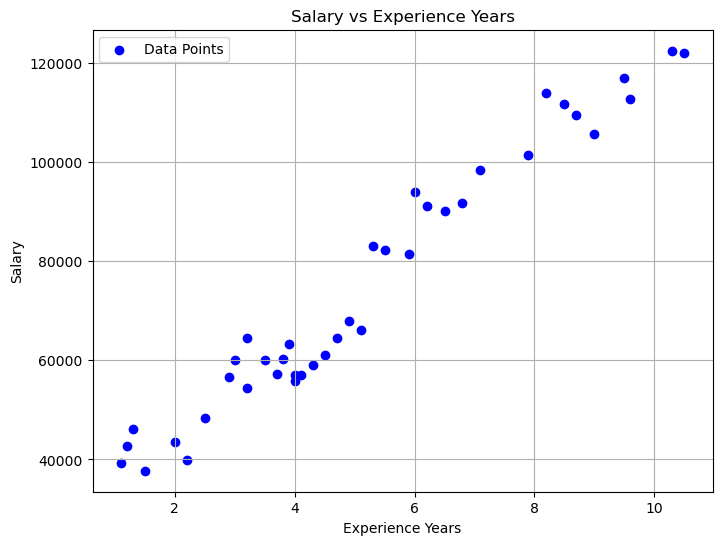

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue')
plt.title('Salary vs Experience Years')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.legend(['Data Points'])
plt.grid()
plt.show()


### 🧮 Split the data to train and test sets.
* in fact we must split the data to train, vlaidation and test sets. But for simplicity we will split the data to train and test sets only. Since we have no data enough to split it to three sets.
* train data is used to train the model.
* test data is used to evaluate the model.
* there is specific class in sklearn library to split the data to train and test sets. It is called train_test_split.
* there is specific attribute called model_selection in sklearn library. This attribute contains the class train_test_split.


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

X_train, y_train, X_test, y_test

print("X train: \n {}".format(X_train))
print("y train: \n {}".format(y_train))
print("X test: \n {}".format(X_test))
print("y test: \n {}".format(y_test))

print("the shapes of train and test sets: ")
print("shape of x train: {}".format(X_train.shape))
print("shape of y train: {}".format(y_train.shape))
print("shape of x test: {}".format(X_test.shape))   
print("shape of y test: {}".format(y_test.shape))

X train: 
 [ 3.8  7.9  8.7  3.   4.1  5.5  1.1  8.5  2.2  3.5  1.2  6.8  4.9  1.3
  7.1  9.5  1.5  9.   5.3  8.2  3.2  5.1  4.3  4.7  2.9  3.9  6.5 10.3]
y train: 
 [ 60200 101302 109431  60150  57081  82200  39343 111620  39891  60000
  42774  91738  67938  46205  98273 116969  37731 105582  83088 113812
  64445  66029  59095  64500  56642  63218  90000 122391]
X test: 
 [ 4.5  4.   4.   6.   2.   3.7  9.6  6.2 10.5  2.5  5.9  3.2]
y test: 
 [ 61111  56957  55794  93940  43525  57189 112635  91000 121872  48266
  81363  54445]
the shapes of train and test sets: 
shape of x train: (28,)
shape of y train: (28,)
shape of x test: (12,)
shape of y test: (12,)


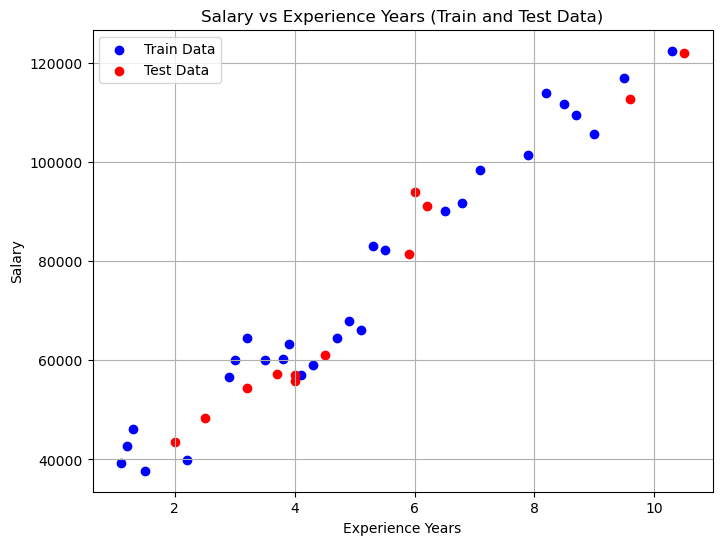

In [60]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.title('Salary vs Experience Years (Train and Test Data)')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

### ✅Normalize the data
* it is important to normalize the data before training the model. This is because the model will converge faster if the data is normalized.
* there is specific class in sklearn library to normalize the data. It is called StandardScaler.
* there is specific attribute called preprocessing in sklearn library. This attribute contains the class StandardScaler.
* Standard Scaler normalizes the data by subtracting the mean and dividing by the standard deviation. It transforms the data to have a mean of 0 and a standard deviation of 1. data = (data - mean) / std, data will be transfer to standard normal distribution.So, data will be put in the range of -1 to 1.

In [61]:
# convert to 2D array
X_train = X_train.reshape(-1, 1) # reshape to 2D array
y_train = y_train.reshape(-1, 1) # reshape to 2D array
X_test = X_test.reshape(-1, 1) # reshape to 2D array
y_test = y_test.reshape(-1, 1) # reshape to 2D array
X_train.shape, X_test.shape, y_train.shape, y_test.shape # check the shapes after reshaping

((28, 1), (12, 1), (28, 1), (12, 1))

In [62]:
# ✅Normalize the data
x_scaler = StandardScaler() # create an object of StandardScaler class
X_train = x_scaler.fit_transform(X_train) # fit and transform the data

y_scaler = StandardScaler() # create an object of StandardScaler class
y_train = y_scaler.fit_transform(y_train) # fit and transform the data  

X_test = x_scaler.transform(X_test) # transform the data
y_test = y_scaler.transform(y_test) # transform the data   

print("X train after normalization: \n {}".format(X_train))
print("y train after normalization: \n {}".format(y_train))
print("X test after normalization: \n {}".format(X_test))
print("y test after normalization: \n {}".format(y_test))


X train after normalization: 
 [[-0.50246549]
 [ 1.03165787]
 [ 1.33099901]
 [-0.80180663]
 [-0.39021256]
 [ 0.13363444]
 [-1.51274185]
 [ 1.25616373]
 [-1.10114778]
 [-0.61471842]
 [-1.47532421]
 [ 0.6200638 ]
 [-0.09087142]
 [-1.43790657]
 [ 0.73231673]
 [ 1.63034016]
 [-1.36307128]
 [ 1.44325194]
 [ 0.05879915]
 [ 1.1439108 ]
 [-0.72697135]
 [-0.01603613]
 [-0.31537728]
 [-0.1657067 ]
 [-0.83922428]
 [-0.46504785]
 [ 0.50781087]
 [ 1.9296813 ]]
y train after normalization: 
 [[-0.58951916]
 [ 1.00291096]
 [ 1.31785584]
 [-0.59145633]
 [-0.71035975]
 [ 0.26283504]
 [-1.3975897 ]
 [ 1.40266508]
 [-1.37635833]
 [-0.59726784]
 [-1.26466118]
 [ 0.63236934]
 [-0.28972294]
 [-1.13173267]
 [ 0.88555728]
 [ 1.60990338]
 [-1.46004401]
 [ 1.16873259]
 [ 0.29723916]
 [ 1.48759055]
 [-0.42505355]
 [-0.36368404]
 [-0.63233059]
 [-0.42292266]
 [-0.72736809]
 [-0.47259166]
 [ 0.56503335]
 [ 1.81996995]]
X test after normalization: 
 [[-0.24054199]
 [-0.42763021]
 [-0.42763021]
 [ 0.32072265]
 [-1.1

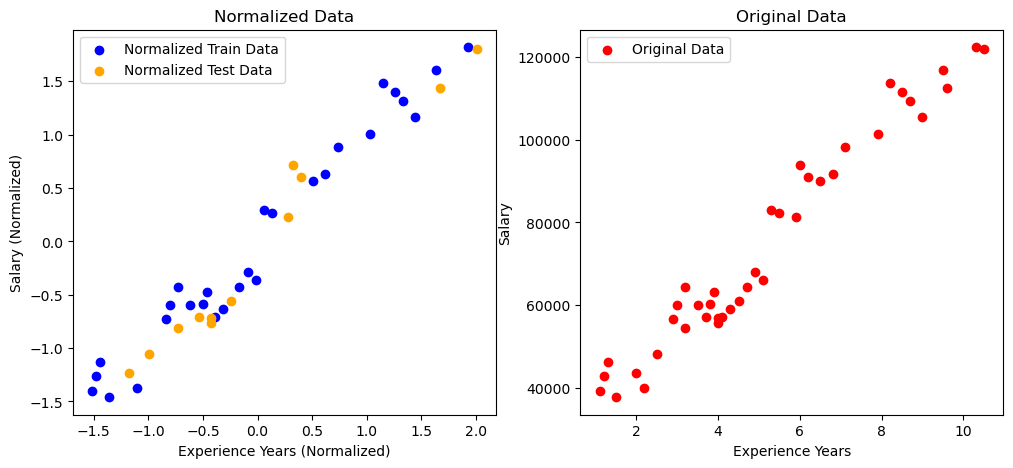

In [63]:
# plot the normalized data and original data in different figures
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Normalized Data')
plt.scatter(X_test, y_test, color='orange', label='Normalized Test Data')
plt.legend(['Normalized Train Data', 'Normalized Test Data'])
plt.title('Normalized Data')
plt.xlabel('Experience Years (Normalized)')
plt.ylabel('Salary (Normalized)')
plt.subplot(1, 2, 2)
plt.scatter(salary_data["Experience Years"], salary_data["Salary"], color='red', label='Original Data')
plt.title('Original Data')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.legend()
plt.show()


### convert to torch tensors
* PyTorch models work with tensors. So, we need to convert the numpy arrays to torch tensors.
### Reshape the data
* we need to reshape the data to 2D arrays. This is because the model expects the input data to be in 2D format.
* we can use the reshape method of numpy arrays to reshape the data.
* of course we reshaped them in the previous step.
### float32
* as default numpy creates arrays with float64 type.
* we need to convert the data to float32 type. This is because PyTorch models work with float32 type.

In [64]:
# convert to torch tensors and float32
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test,  dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test,  dtype=torch.float32)

print("X train tensor:\n", X_train_tensor)
print("y train tensor:\n", y_train_tensor)
print("X test tensor:\n", X_test_tensor)
print("y test tensor:\n", y_test_tensor)

# check the shapes of tensors
print("the shapes of train and test tensors:")
print("shape of X_train_tensor:", X_train_tensor.shape)
print("shape of y_train_tensor:", y_train_tensor.shape)
print("shape of X_test_tensor:",  X_test_tensor.shape)
print("shape of y_test_tensor:",  y_test_tensor.shape)

X train tensor:
 tensor([[-0.5025],
        [ 1.0317],
        [ 1.3310],
        [-0.8018],
        [-0.3902],
        [ 0.1336],
        [-1.5127],
        [ 1.2562],
        [-1.1011],
        [-0.6147],
        [-1.4753],
        [ 0.6201],
        [-0.0909],
        [-1.4379],
        [ 0.7323],
        [ 1.6303],
        [-1.3631],
        [ 1.4433],
        [ 0.0588],
        [ 1.1439],
        [-0.7270],
        [-0.0160],
        [-0.3154],
        [-0.1657],
        [-0.8392],
        [-0.4650],
        [ 0.5078],
        [ 1.9297]])
y train tensor:
 tensor([[-0.5895],
        [ 1.0029],
        [ 1.3179],
        [-0.5915],
        [-0.7104],
        [ 0.2628],
        [-1.3976],
        [ 1.4027],
        [-1.3764],
        [-0.5973],
        [-1.2647],
        [ 0.6324],
        [-0.2897],
        [-1.1317],
        [ 0.8856],
        [ 1.6099],
        [-1.4600],
        [ 1.1687],
        [ 0.2972],
        [ 1.4876],
        [-0.4251],
        [-0.3637],
        [-0.632

### Model setup
* The data has been show that there is a linear relationship between experience years and salary. So, we can use linear regression model to predict the salary based on experience years.
* The model linear regression in terms of mathematical equation is: $h(\theta)=\theta_1 x + \theta_0$ that is caleed hypothesis function.

  * $h(\theta)$: the target variable (salary)
  * $x$: the input variable (experience years)
  * $\theta_1$: the slope of the line (weight)
  * $\theta_0$: the y-intercept (bias)
  * $\hat{y} = \text{weight} * x + \text{bias} = \theta_1 x + \theta_0 $ 

![Linear Regression Model](../images/LR_model_01.png)

* $\hat{y} \approx h(\theta) = \theta_1 x + \theta_0$

* In the next cell the $\hat{y}$ will be defined as python function.
* $\theta_0$ and $\theta_1$ must be determined by machine learning model during the training process.
* In the function below the $\theta_0$ and $\theta_1$ need to initial vlaues. That we consider them as parameters of the function as initial guess values.

In [65]:
# define a function to estimate
def linear_regression(x, theta0,theta1):
    return theta0 + theta1 * x

In [66]:
# initial guess for parameters 
theta0 = torch.randn(1)  # intercept
theta1 = torch.randn(1)  # slope
print("Initial theta0 (intercept): {}".format(theta0))
print("Initial theta1 (slope): {}".format(theta1))

linear_regression(X_train_tensor[0], theta0, theta1)

Initial theta0 (intercept): tensor([-0.6063])
Initial theta1 (slope): tensor([1.1084])


tensor([-1.1633])

### Test the function defined model

The value test estimate is: 1
torch.Size([28, 1]) torch.Size([28, 1]) torch.Size([28, 1])


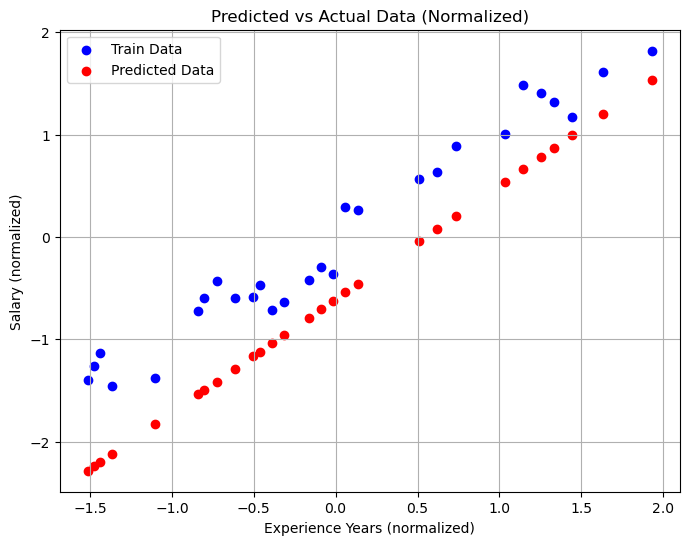

In [67]:
y_hat = linear_regression(1,2,-1) # test the function
print("The value test estimate is: {}".format(y_hat))

# predictions over the full training tensor
y_hat = linear_regression(X_train_tensor, theta0, theta1)

print(X_train_tensor.shape, y_hat.shape, y_train_tensor.shape)

plt.figure(figsize=(8,6))
plt.scatter(X_train_tensor.squeeze(), y_train_tensor.squeeze(), color='blue', label='Train Data')
plt.scatter(X_train_tensor.squeeze(), y_hat.detach().squeeze(), color='red', label='Predicted Data')
plt.title('Predicted vs Actual Data (Normalized)')
plt.xlabel('Experience Years (normalized)')
plt.ylabel('Salary (normalized)')
plt.legend()
plt.grid()
plt.show()

### OOP Implementation of the Linear Regression Model
* In the previous section we defined the linear regression model as a function. But in this section we will define the linear regression model as a class. This is because in the next sections we will add more functionalities to the model. So, it is better to define the model as a class.
* The class will have the following methods:
  * `__init__`: to initialize the parameters of the model.
  * `forward`: to compute the output of the model.


In [80]:
class linear_regression_model:
    def __init__(self, theta0=None, theta1=None):
        # initialize parameters
        self.theta0 = theta0 if theta0 is not None else torch.randn(1)  # intercept
        self.theta1 = theta1 if theta1 is not None else torch.randn(1)  # slope
    
    # method to compute the forward pass
    def forward(self, x):
        y_hat = self.theta0 + self.theta1 * x # linear equation
        return y_hat
    
    # the __call__ method to make the object callable
    def __call__(self, x): 
        return self.forward(x) # allow the object to be called like a function

In [91]:
# test the class
model = linear_regression_model() # create an instance of the class
y_hat_1 = model(X_train_tensor) # call the object like a function
y_hat = model.forward(X_train_tensor) # call the forward method directly

model.theta0, model.theta1 # print the parameters randomly initialized

y_hat # estimated values



tensor([[-0.1479],
        [-2.3843],
        [-2.8206],
        [ 0.2884],
        [-0.3116],
        [-1.0752],
        [ 1.3248],
        [-2.7115],
        [ 0.7248],
        [ 0.0157],
        [ 1.2702],
        [-1.7843],
        [-0.7479],
        [ 1.2157],
        [-1.9479],
        [-3.2570],
        [ 1.1066],
        [-2.9843],
        [-0.9661],
        [-2.5479],
        [ 0.1793],
        [-0.8570],
        [-0.4207],
        [-0.6388],
        [ 0.3430],
        [-0.2025],
        [-1.6207],
        [-3.6933]])

until now we have defined the model as a function, also connect the data to the model function. now we will start training the model. In the first step I must understand what is the meaning of training the model and also whar the components of a training process are.
Each training process has the following components:
* Loss function
* Optimizer
* Training loop

Loss function is a function that measure the difference between the prediced values and the actual values. The goal of the training process is to minimize the loss function.
* there are different types of loss functions. For regression problems, the most common loss function is Mean Squared Error (MSE) and Mean Absolute Error (MAE).

In the MSE loss function the difference between the predicted values and the actual values is squared and then averaged. The formula for MSE is:
$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
where: 
* n: number of samples
* y_i: actual value
* $\hat{y}_i$: predicted value
* there is specific class in sklearn library to calculate the MSE loss. It is called mean_squared_error.
* there is specific attribute called metrics in sklearn library. This attribute contains the class mean_squared_error

In the MAE loss function the difference between the predicted values and the actual values is averaged. The formula for MAE is:
$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$
where:
* n: number of samples
* y_i: actual value
* $\hat{y}_i$: predicted value
* there is specific class in sklearn library to calculate the MAE loss. It is called mean_absolute_error.
* there is specific attribute called metrics in sklearn library. This attribute contains the class mean_absolute_error

the schematic of the training process is shown below:

![Training Process](../images/LR_model_02.png)

#### Analze the loss function
* in this section we will analze the loss function.
In the first step, $\theta_0=0$ considered and $\theta_1$ will be chnaged from -3 t0 5. for each value of $\theta_1$ the loss function will be calculated and plotted.
* as we can see from the plot below, the loss function is a convex function. So, there is a global minimum point. The goal of the training process is to find the values of $\theta_0$ and $\theta_1$ that minimize the loss function.
In the second step, $\theta_1=1$ considered and $\theta_0$ will be chnaged from -3 t0 5. for each value of $\theta_0$ the loss function will be calculated and plotted.
* as we can see from the plot below, the loss function is a convex function. So, there is a global minimum point. The goal of the training process is to find the values of $\theta_0$ and $\theta_1$ that minimize the loss function.


In [110]:
class Loss:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
    
    def mse(self):
        # Mean Squared Error
        return torch.mean((self.y_true - self.y_pred) ** 2)
    
    def mae(self):
        # Mean Absolute Error
        return torch.mean(torch.abs(self.y_true - self.y_pred))
    
    def rmse(self):
        # Root Mean Squared Error
        return torch.sqrt(self.mse())

Losses vs Theta1 (Theta0 fixed): tensor(9.0416)
Losses vs Theta0 (Theta0 fixed): tensor(62)
Losses vs Theta1 (Theta1 fixed): tensor(1.0838)
Losses vs Theta0 (Theta1 fixed): tensor(50)


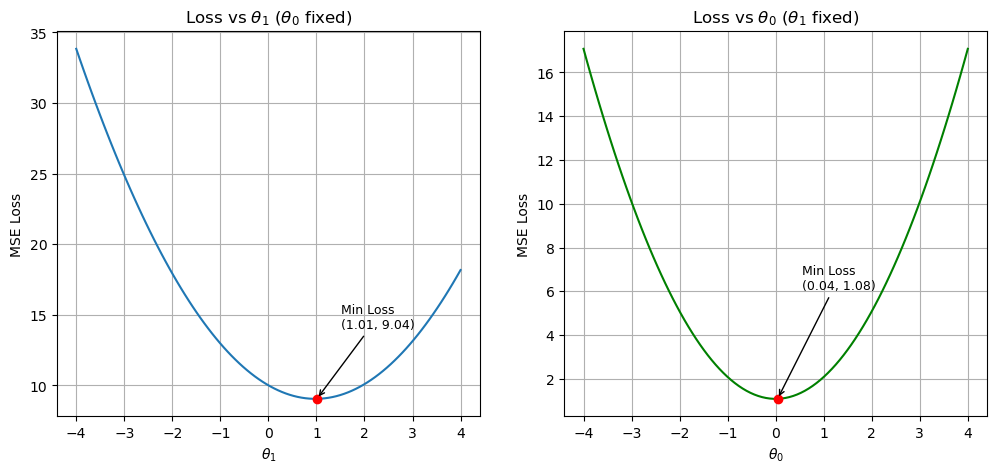

In [153]:
# 1. Loss Calculation test
loss = Loss(y_true=y_train_tensor, y_pred=y_hat)
mse = loss.mse()
rmse = loss.rmse()
mae = loss.mae()
mse, rmse, mae

# 2. Calculate Loss vs Theta1 (Theta0 Fixed)
theta0_fix = 3.0 # fixed theta0
x = X_train_tensor.squeeze()
y_true = y_train_tensor.squeeze()
theta1_range = torch.linspace(-4, 4, 100)
losses_t1 = []

for t1 in theta1_range:
    # Model prediction: y = theta0 + theta1 * x
    y_pred = theta0_fix + t1 * x 
    losses_t1.append(Loss(y_true, y_pred).mse().item())
    
min_loss_t1 = torch.min(torch.tensor(losses_t1))
index_min_loss_t1 = torch.argmin(torch.tensor(losses_t1))

print("Losses vs Theta1 (Theta0 fixed):", min_loss_t1) # minimum loss
print("Losses vs Theta0 (Theta0 fixed):", index_min_loss_t1) # index of minimum loss
    

#  3. Calculate Loss vs Theta0 (Theta1 Fixed)
theta1_fix = 2.0
theta0_range = torch.linspace(-4, 4, 100)
losses_t0 = []

for t0 in theta0_range:
    # Model prediction: y = theta0 + theta1 * x
    y_pred = t0 + theta1_fix * x
    losses_t0.append(Loss(y_true, y_pred).mse().item())
    
min_loss_t0 = torch.min(torch.tensor(losses_t0))
index_min_loss_t0 = torch.argmin(torch.tensor(losses_t0))

print("Losses vs Theta1 (Theta1 fixed):", min_loss_t0) # minimum loss
print("Losses vs Theta0 (Theta1 fixed):", index_min_loss_t0) # index of minimum loss
# 4. Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1
axs[0].plot(theta1_range, losses_t1)
axs[0].set_title(r'Loss vs $\theta_1$ ($\theta_0$ fixed)')
axs[0].set_xlabel(r'$\theta_1$')
axs[0].set_ylabel('MSE Loss')
axs[0].grid()
axs[0].plot(theta1_range[index_min_loss_t1], losses_t1[index_min_loss_t1], 'ro')  # mark the minimum point
# Label the point
axs[0].annotate(f'Min Loss\n({theta1_range[index_min_loss_t1]:.2f}, {losses_t1[index_min_loss_t1]:.2f})',
                xy=(theta1_range[index_min_loss_t1], losses_t1[index_min_loss_t1]),
                xytext=(theta1_range[index_min_loss_t1]+0.5, losses_t1[index_min_loss_t1]+5),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                fontsize=9)


# Plot 2
axs[1].plot(theta0_range, losses_t0, color='green')
axs[1].set_title(r'Loss vs $\theta_0$ ($\theta_1$ fixed)')
axs[1].set_xlabel(r'$\theta_0$')
axs[1].set_ylabel('MSE Loss')
axs[1].grid()
axs[1].plot(theta0_range[index_min_loss_t0], losses_t0[index_min_loss_t0], 'ro')  # mark the minimum point

# Label the point
axs[1].annotate(f'Min Loss\n({theta0_range[index_min_loss_t0]:.2f}, {losses_t0[index_min_loss_t0]:.2f})',
                xy=(theta0_range[index_min_loss_t0], losses_t0[index_min_loss_t0]),
                xytext=(theta0_range[index_min_loss_t0]+0.5, losses_t0[index_min_loss_t0]+5),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                fontsize=9)


plt.savefig('./../images/loss_vs_theta.png', dpi=300) # Added dpi=300 for high quality

plt.show()


### 3D plot of the loss function
* in this section we will plot the loss function in 3D space. The x-axis represents the values of $\theta_1$, the y-axis represents the values of $\theta_0$, and the z-axis represents the values of the loss function.

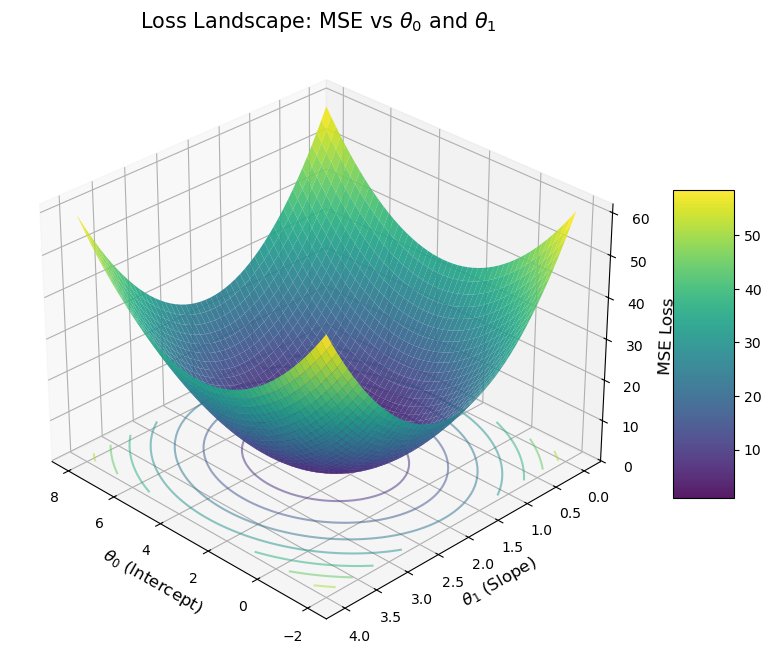

In [155]:
from mpl_toolkits.mplot3d import Axes3D

# 1. Setup Data (Same as before)
torch.manual_seed(42)
x = torch.linspace(-5, 5, 100)
true_theta0 = 3.0
true_theta1 = 2.0
y_true = true_theta0 + true_theta1 * x + torch.randn(x.shape) * 1.0

# 2. Define ranges for theta0 and theta1
theta0_vals = np.linspace(-2, 8, 50)
theta1_vals = np.linspace(0, 4, 50)

# 3. Create a grid
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
Z = np.zeros_like(T0)

# 4. Calculate Loss for every point on the grid
# Using nested loops is clear, though vectorization is faster. 
# For 50x50=2500 points, loops are fine and easier to read.
for i in range(len(theta1_vals)):
    for j in range(len(theta0_vals)):
        t0 = T0[i, j]
        t1 = T1[i, j]
        
        # Prediction
        y_pred = t0 + t1 * x
        
        # MSE Loss
        loss = torch.mean((y_true - y_pred) ** 2).item()
        Z[i, j] = loss

# 5. Plotting 3D Surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(T0, T1, Z, cmap='viridis', edgecolor='none', alpha=0.9)

# Labels
ax.set_xlabel(r'$\theta_0$ (Intercept)', fontsize=12)
ax.set_ylabel(r'$\theta_1$ (Slope)', fontsize=12)
ax.set_zlabel('MSE Loss', fontsize=12)
ax.set_title(r'Loss Landscape: MSE vs $\theta_0$ and $\theta_1$', fontsize=15)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Adjust view angle for better "bowl" visualization
ax.view_init(elev=30, azim=135)

plt.contour(T0, T1, Z, zdir='z', offset=np.min(Z), cmap='viridis', alpha=0.5)

plt.savefig('./../images/loss_surface_3d.png')

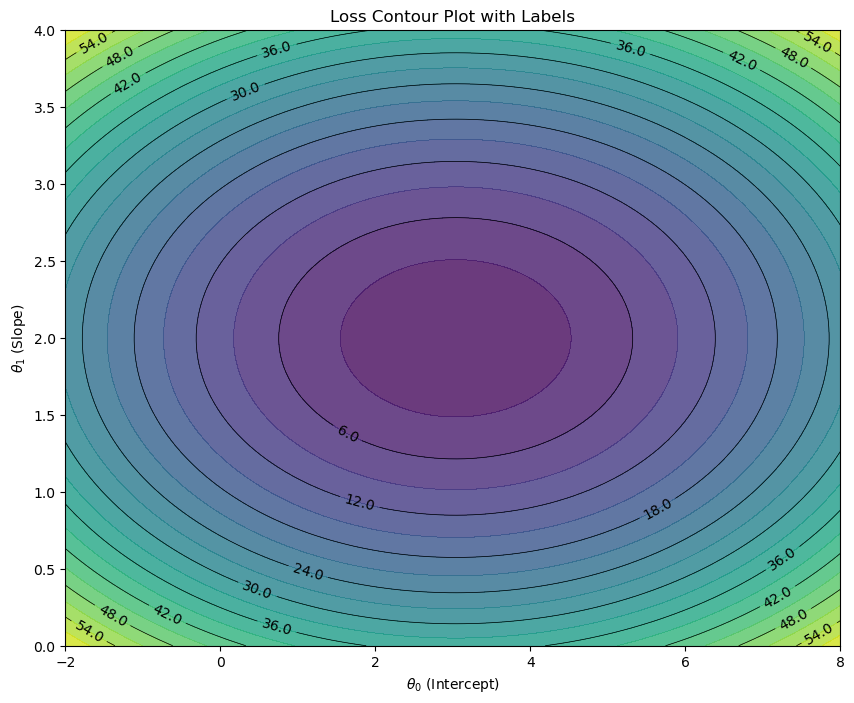

In [157]:
# 1. Setup Data (same as before)
x = torch.linspace(-5, 5, 100)
y_true = 3.0 + 2.0 * x + torch.randn(x.shape) * 1.0
theta0_vals = np.linspace(-2, 8, 100)
theta1_vals = np.linspace(0, 4, 100)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
Z = np.zeros_like(T0)

for i in range(len(theta1_vals)):
    for j in range(len(theta0_vals)):
        y_pred = T0[i, j] + T1[i, j] * x
        Z[i, j] = torch.mean((y_true - y_pred) ** 2).item()

# 2. Plotting
plt.figure(figsize=(10, 8))

# A. Filled Contours (Background colors)
plt.contourf(T0, T1, Z, levels=20, cmap='viridis', alpha=0.8)

# B. Line Contours (The actual lines to label)
# We save this to a variable 'line_contours'
line_contours = plt.contour(T0, T1, Z, levels=10, colors='black', linewidths=0.5)

# C. Add Labels to the lines
plt.clabel(line_contours, inline=True, fontsize=10, fmt='%1.1f')

# Labels and Save
plt.title('Loss Contour Plot with Labels')
plt.xlabel(r'$\theta_0$ (Intercept)')
plt.ylabel(r'$\theta_1$ (Slope)')

plt.savefig('./../images/loss_contour_labeled.png', dpi=300)
plt.show()

the whole process of estimae and trainig the linear regression for the finding the best parameters $\theta_0$ and $\theta_1$ is shown below:


![Linear Regression Model](../images/LR_model_03.png)


### Analyze the optimizer
* in this section we will analyze the optimizer.
